In [ ]:
# 정형데이터: 
# 비정형데이터: 딥러닝

In [3]:
from tensorflow import keras
# 10가지 패션 아이템 : 이미지 데이터
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

In [17]:
import matplotlib.pyplot as plt
train_x.shape, test_x.shape # 훈련데이터 6만개, 가로28, 세로28 / 테스트데이터 만개, 28x28

((60000, 28, 28), (10000, 28, 28))

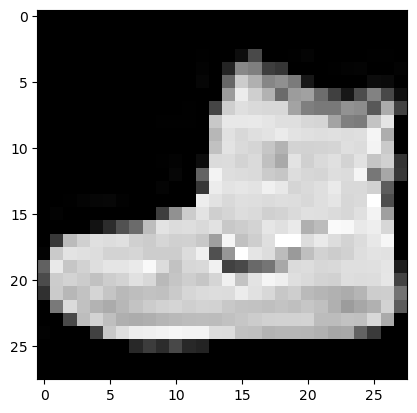

In [27]:
# 신발 그림
plt.imshow(train_x[0], cmap='gray')

In [29]:
train_y[0] # 신발: 9

9

In [35]:
# 문제집 : 2차원 행렬이어야하고, 정답지 : 1차원 행렬이어야함
train_scaled = train_x.reshape(60000,784)
test_scaled = test_x.reshape(10000, 784)
train_scaled.shape, test_scaled.shape

((60000, 784), (10000, 784))

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() # K-최근접 분류
knn.fit(train_scaled, train_y)

KNeighborsClassifier()

In [39]:
knn.score(test_scaled, test_y) # KNN 정확도: 85.54%

0.8554

In [41]:
# 랜덤포레스트로 한번 성능을 평가
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_scaled, train_y)

RandomForestClassifier()

In [42]:
rf.score(test_scaled, test_y) #랜덤포레스트 정확도: 87.47%

0.8747

In [59]:
# 인공신경망 

# 데이터 로드 및 전처리
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

# 문제집: 2차원 행렬이어야 하고, 정답지: 1차원 행렬이어야 함
train_scaled = train_x.reshape(60000, 784) / 255.0
test_scaled = test_x.reshape(10000, 784) / 255.0

# 모델 생성
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# EarlyStopping 콜백 설정
early_stopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

# 모델 학습
hist = model.fit(train_scaled, train_y, epochs=50, batch_size=64,
                 validation_split=0.2, validation_data=(test_scaled,test_y),
                 callbacks=[early_stopping])

# 모델 평가
test_loss, test_acc = model.evaluate(test_scaled, test_y)
print(f"Test accuracy: {test_acc}")

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7093 - loss: 0.8001 - val_accuracy: 0.8366 - val_loss: 0.4420
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8385 - loss: 0.4496 - val_accuracy: 0.8504 - val_loss: 0.4111
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8551 - loss: 0.4059 - val_accuracy: 0.8653 - val_loss: 0.3712
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8624 - loss: 0.3800 - val_accuracy: 0.8505 - val_loss: 0.3930
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8677 - loss: 0.3655 - val_accuracy: 0.8681 - val_loss: 0.3706
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8715 - loss: 0.3534 - val_accuracy: 0.8731 - val_loss: 0.3561
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8727 - loss: 0.3490 - val_accuracy: 0.8727 - val_loss: 0.3454
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8782 - loss: 0.3315 - val_accuracy: 0.

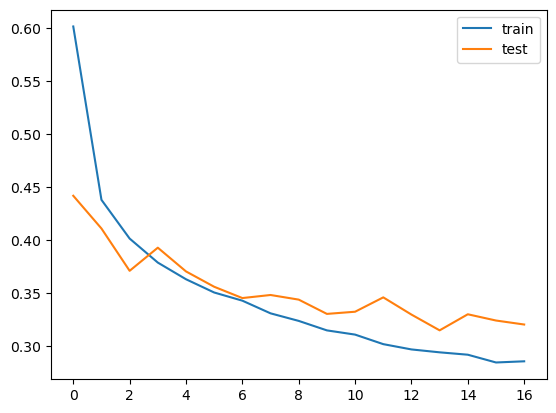

In [60]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','test'])

In [63]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,702,304 (6.49 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,134,870 (4.33 MB)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.6044 - loss: 1.0829 - val_accuracy: 0.8045 - val_loss: 0.5247
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.8093 - loss: 0.5283 - val_accuracy: 0.8407 - val_loss: 0.4312
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.8391 - loss: 0.4431 - val_accuracy: 0.8501 - val_loss: 0.3958
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.8546 - loss: 0.3977 - val_accuracy: 0.8593 - val_loss: 0.3662
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.8739 - loss: 0.3511 - val_accuracy: 0.8664 - val_loss: 0.3596
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.8806 - loss: 0.3261 - val_accuracy: 0.8726 - val_loss: 0.3328
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 42ms/step - accuracy: 0.8890 - loss: 0.3073 - val_accuracy: 0.8817 - val_loss: 0.3112
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9006 - loss: 0.2797 - 

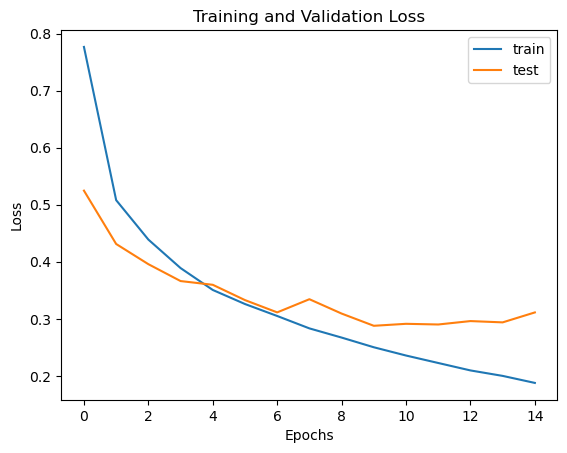

In [69]:
####################
# ChatGPT CNN
####################

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# 데이터 로드 및 전처리
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

# 데이터 정규화 (0~1 사이 값으로 스케일링)
train_x = train_x / 255.0
test_x = test_x / 255.0

# 데이터 형태 변경 (채널 추가)
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

# 모델 생성
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),  # MaxPooling2D 적용
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),  # MaxPooling2D 적용
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),  # MaxPooling2D 적용
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# EarlyStopping 콜백 설정
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# 모델 학습
hist = model.fit(train_x, train_y, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# 모델 평가
test_loss, test_acc = model.evaluate(test_x, test_y)
print(f"Test accuracy: {test_acc}")

# 손실 함수 시각화
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train', 'test'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()


In [83]:
####################
# CNN
####################
from tensorflow import keras

(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_x.reshape(60000, 28, 28, 1) / 255
test_scaled = test_x.reshape(10000, 28, 28, 1) / 255  # 4차원으로 만들기. 흑백이미지인 경우 기본적으로 2차원으로 되어 있음.

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu'
                              , input_shape = (28, 28, 1)))  # 32: mask를 32개 넣겠다. 이미지의 특징을 32개를 잡겠다.
model.add(keras.layers.MaxPooling2D((2, 3)))  # 14X14, 32장

model.add(keras.layers.Conv2D(16, (3, 3), padding = 'same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))  # 7X7, 16장

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation = 'softmax'))

# 모델 컴파일
model.compile(optimizer='adam',  # adam 옵션: 학습률을 지정해주지 않아도 자동으로 조정.
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping 콜백 설정 (과대적합이 발생하기 전에 patience 값에 따라 학습을 조기 종료하는 함수)
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# 모델 학습
hist = model.fit(train_scaled, train_y, epochs=100000, validation_split=0.2, validation_data=(test_scaled,test_y),
          callbacks=[early_stopping])

Epoch 1/100000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.7366 - loss: 0.7329 - val_accuracy: 0.8621 - val_loss: 0.3669
Epoch 2/100000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8723 - loss: 0.3544 - val_accuracy: 0.8842 - val_loss: 0.3263
Epoch 3/100000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8896 - loss: 0.3031 - val_accuracy: 0.8961 - val_loss: 0.2888
Epoch 4/100000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8984 - loss: 0.2790 - val_accuracy: 0.9006 - val_loss: 0.2770
Epoch 5/100000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9061 - loss: 0.2571 - val_accuracy: 0.8959 - val_loss: 0.2903
Epoch 6/100000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9124 - loss: 0.2390 - val_accuracy: 0.9024 - val_loss: 0.2768
Epoch 7/100000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9140 - loss: 0.2300 - val_accuracy: 0.9045 - val_loss: 0.2631
Epoch 8/100000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Class  
0                     0.627   50      1  
1                     0.351   31      0  
2                     0.672   32      1  
3                     0.167   21      0  
4                     2.288   33      1  
Epoch 1/200


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4794 - loss: 0.7164 - val_accuracy: 0.6423 - val_loss: 0.6542
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6423 - loss: 0.6543 - val_accuracy: 0.6585 - val_loss: 0.6241
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7104 - loss: 0.5925 - val_accuracy: 0.6748 - val_loss: 0.6020
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6925 - loss: 0.5786 - val_accuracy: 0.6829 - val_loss: 0.5749
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7040 - loss: 0.5499 - val_accuracy: 0.7154 - val_loss: 0.5493
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7442 - loss: 0.4919 - val_accuracy: 0.7154 - val_loss: 0.5308
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7193 - loss: 0.5309 - val_accuracy: 0.7398 - val_loss: 0.5125
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7541 - loss: 0.4928 - val_accuracy: 0.7317 - val_loss: 0.

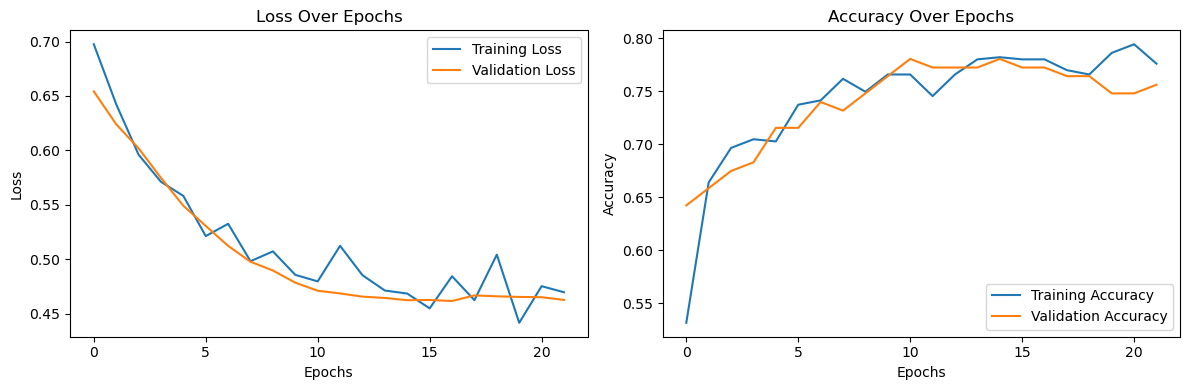

In [113]:
# pima_indians.csv (class 열 정답지 1 당뇨, 0 당뇨아님
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 로드
data = pd.read_csv("pima_indians.csv")
# 데이터 확인
print(data.head())

# 특성과 라벨 분리
X = data.drop('Class', axis=1)
y = data['Class']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 정의
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping 콜백 설정
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

import matplotlib.pyplot as plt

# 학습 과정 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6934 - loss: 0.5398 
Deep Learning Test Loss: 0.5414788722991943
Deep Learning Test Accuracy: 0.7207792401313782


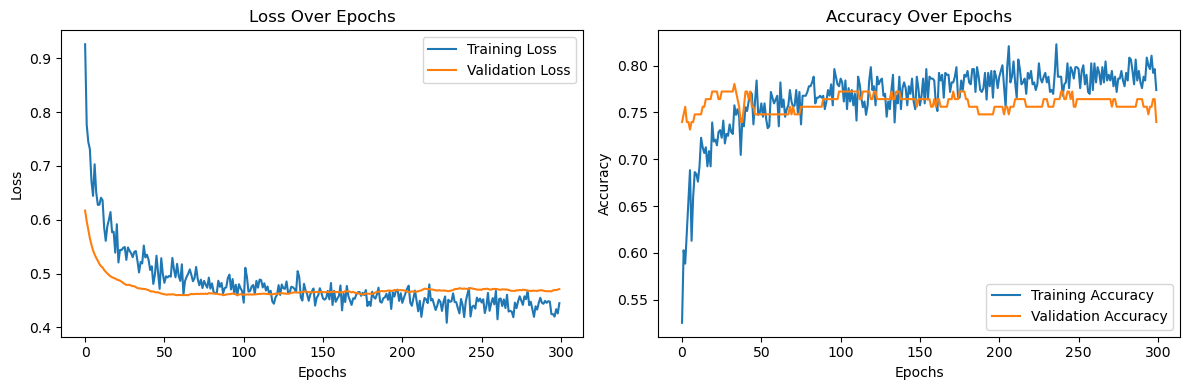

In [150]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 로드
data = pd.read_csv("pima_indians.csv")

# 특성과 라벨 분리
X = data.drop('Class', axis=1)
y = data['Class']

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의 함수
def create_model():
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(16, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 모델 학습 및 평가
model = create_model()

early_stopping = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2, verbose=0)

# 최종 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Deep Learning Test Loss: {loss}')
print(f'Deep Learning Test Accuracy: {accuracy}')

# 학습 과정 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [126]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 로드
pima_indians = pd.read_csv("pima_indians.csv")

# 문제지(X), 답안지(Y)를 정의
X = pima_indians.iloc[:, :-1].to_numpy()
Y = pima_indians['Class'].to_numpy()

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 랜덤포레스트를 통한 학습 및 평가
rf = RandomForestClassifier(oob_score=True, n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 테스트 데이터 평가
y_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Test Accuracy: {test_accuracy}')
print(f'Random Forest OOB Score: {rf.oob_score_}')


Random Forest Test Accuracy: 0.7207792207792207
Random Forest OOB Score: 0.752442996742671


In [144]:
!pip3 install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00a 0:00:01


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras_tuner as kt

# 데이터 로드
data = pd.read_csv("pima_indians.csv")

# 특성과 라벨 분리
X = data.drop('Class', axis=1)
y = data['Class']

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의 함수
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                                    activation='relu', input_shape=(X_train.shape[1],)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Keras Tuner를 사용한 하이퍼파라미터 튜닝
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=10, executions_per_trial=3, directory='my_dir', project_name='pima_indians')

# 튜닝 수행
tuner.search(X_train, y_train, epochs=100, validation_split=0.2)

# 최적 모델 찾기
best_model = tuner.get_best_models(num_models=1)[0]

# 최적 모델 학습 및 평가
history = best_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=0)
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Optimized Deep Learning Test Loss: {loss}')
print(f'Optimized Deep Learning Test Accuracy: {accuracy}')

# 학습 과정 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Trial 9 Complete [00h 00m 38s]
val_accuracy: 0.7804878155390421

Best val_accuracy So Far: 0.7967479825019836
Total elapsed time: 00h 05m 00s

Search: Running Trial #10

Value             |Best Value So Far |Hyperparameter
384               |320               |units
0.3               |0.2               |dropout
0.01              |0.01              |learning_rate

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6734 - loss: 0.7970 - val_accuracy: 0.6341 - val_loss: 0.6632
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7696 - loss: 0.7057 - val_accuracy: 0.6179 - val_loss: 0.6063
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8031 - loss: 0.4862 - val_accuracy: 0.6179 - val_loss: 0.6585
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7867 - loss: 0.4670 - val_accuracy: 0.6341 - val_loss: 0.6316
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8119 - loss: 0.4395 - val_accuracy: 0.6504 - val_loss: 0.598

Mean Cross-Validation Accuracy: 0.6773690581321716
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8391 - loss: 1.1166 
Optimized Deep Learning Test Loss: 1.1190365552902222
Optimized Deep Learning Test Accuracy: 0.8246753215789795


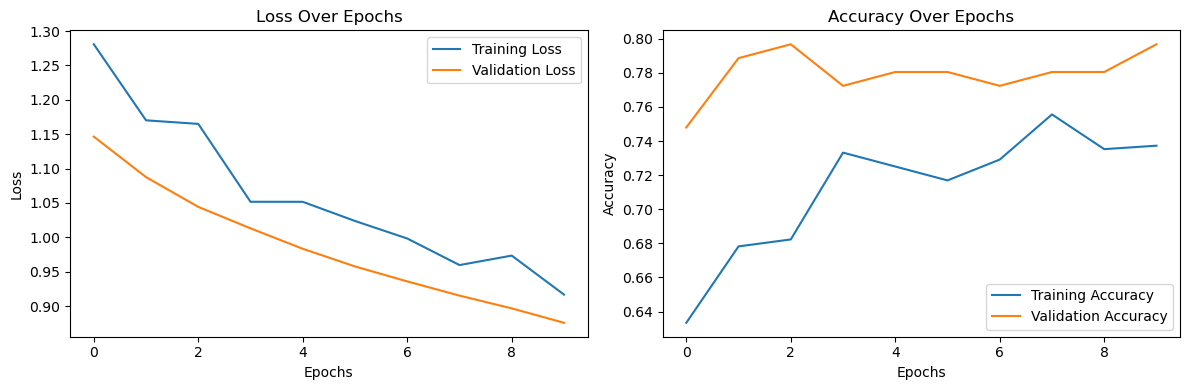

In [174]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv("pima_indians.csv")

# 특성과 라벨 분리
X = data.drop('Class', axis=1).to_numpy()
y = data['Class'].to_numpy()

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의
def build_optimized_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        LeakyReLU(),
        Dropout(0.5),
        tf.keras.layers.Dense(32, kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        LeakyReLU(),
        Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 조기 종료 콜백 설정
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 학습률 감소 콜백 설정
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# K-Fold 크로스밸리데이션 설정
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_index, val_index in kfold.split(X_train):
    X_cv_train, X_cv_val = X_train[train_index], X_train[val_index]
    y_cv_train, y_cv_val = y_train[train_index], y_train[val_index]
    
    model = build_optimized_model()
    history = model.fit(X_cv_train, y_cv_train, epochs=200, batch_size=32, validation_data=(X_cv_val, y_cv_val), callbacks=[early_stopping, lr_scheduler], verbose=0)
    scores = model.evaluate(X_cv_val, y_cv_val, verbose=0)
    cv_scores.append(scores[1])

print(f'Mean Cross-Validation Accuracy: {np.mean(cv_scores)}')

# 최종 모델 학습 및 평가
best_model = build_optimized_model()
history = best_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping, lr_scheduler], verbose=0)
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Optimized Deep Learning Test Loss: {loss}')
print(f'Optimized Deep Learning Test Accuracy: {accuracy}')

# 학습 과정 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 최적 모델 학습 및 저장
best_model.save('best_model.h5')

In [175]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

# 저장된 모델 로드
model = load_model('best_model.h5')

# 데이터 스케일러 로드 (이전에 사용한 StandardScaler 인스턴스를 동일하게 사용)
scaler = StandardScaler()
scaler.fit(X_train)  # 기존 학습 데이터로 스케일러 적합

# 주어진 데이터
My_data = np.array([5, 3, 10, 5, 10, 70, 20, 30]).reshape(1, -1)

# 데이터 정규화
My_data = scaler.transform(My_data)

# 예측 수행
prediction = model.predict(My_data)
print(f'Prediction: {prediction[0][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Prediction: 0.9999856948852539


In [218]:
#정형데이터 : XGboost(약한 학습기가 오차를 학습하는 모델)
#!pip3 install xgboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import joblib

# 데이터 로드
data = pd.read_csv("pima_indians.csv")

# 특성과 라벨 분리
X = data.drop('Class', axis=1)
y = data['Class']

# 데이터 정규화
scaler = StandardScaler()

X = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 정의 및 학습
model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

model_dt = DecisionTreeClassifier(max_depth=2)
model_dt.fit(X_train, y_train)
train_y_pred = model_dt.predict(X_train)
train_y2 = y_train - train_y_pred

model_dt2 = DecisionTreeClassifier(max_depth=2)
model_dt2.fit(X_train, train_y2)
train_y_pred2 = model_dt2.predict(X_train)
train_y_pred2

train_y3 = train_y2 - train_y_pred2
train_y3

model_dt3 = DecisionTreeClassifier(max_depth=2)
model_dt3.fit(X_train,train_y3)
train_y_pred3 = model_dt3.predict(X_train)
train_y_pred3

pred1 = model_dt.predict(X_test)
pred2 = model_dt2.predict(X_test)
pred3 = model_dt3.predict(X_test)
pred = pred1 + pred2 + pred3
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [184]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.1)
gbr.fit(X_train, y_train)
pred= gbr.predict(X_test)
mse = mean_squared_error()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.6 MB/s eta 0:00:0000:0100:01


              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



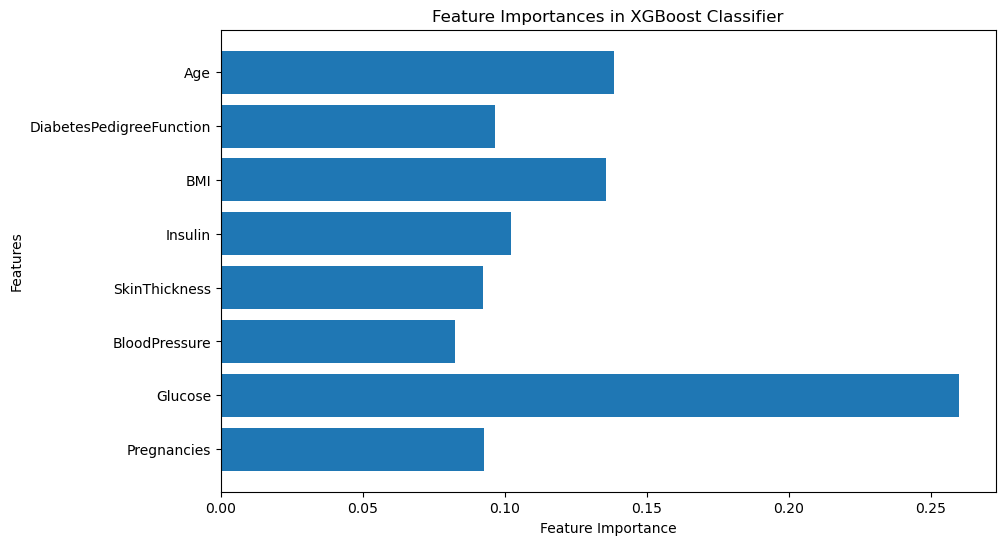

In [236]:
# 필요 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("pima_indians.csv")

# 특성과 라벨 분리
x = df.iloc[:, :-1].to_numpy()
y = df['Class'].to_numpy()

# 학습 데이터와 테스트 데이터 분리 (random_state를 설정하여 재현성 보장)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# XGBoost 분류기 모델 정의 및 학습
xgb = XGBClassifier()
xgb.fit(train_x, train_y)

# 예측 수행
pred_y = xgb.predict(test_x)

# 성능 평가
print(classification_report(test_y, pred_y))


# 특성 중요도 시각화
feature_importances = xgb.feature_importances_
features = df.columns[:-1]  # 특성 이름

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances in XGBoost Classifier')
plt.show()


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



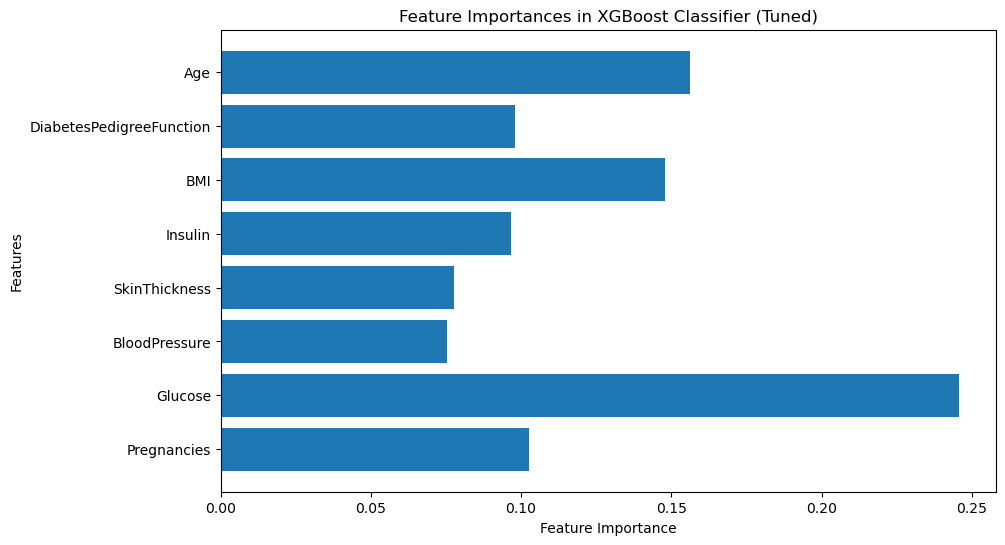

In [238]:
# 필요 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("pima_indians.csv")

# 특성과 라벨 분리
x = df.iloc[:, :-1].to_numpy()
y = df['Class'].to_numpy()

# 학습 데이터와 테스트 데이터 분리 (random_state를 설정하여 재현성 보장)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# XGBoost 분류기
xgb = XGBClassifier()

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(train_x, train_y)

# 최적 하이퍼파라미터 출력
print(f'Best Parameters: {grid_search.best_params_}')

# 최적 모델로 예측 수행
best_xgb = grid_search.best_estimator_
pred_y = best_xgb.predict(test_x)

# 성능 평가
print(classification_report(test_y, pred_y))

# 특성 중요도 시각화
feature_importances = best_xgb.feature_importances_
features = df.columns[:-1]  # 특성 이름

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances in XGBoost Classifier (Tuned)')
plt.show()


In [ ]:
배경자료: 거시경제 자료 금리/통화량/실제주택가격변동추이
Output1: 실제 지역별 주택매매가격 및 매매가격비율에 대한 예측
Output2: 은행Exposure/주담대영향도 분류한 예측 모델